# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('titanic.csv')

print(df.head())


   PassengerId  Survived Pclass  \
0          1.0       0.0      3   
1          2.0       1.0      1   
2          3.0       1.0      3   
3          4.0       1.0      1   
4          5.0       0.0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0            373450   8.0500   NaN        S  


Use the `.info()` method to quickly preview which features have missing data

In [2]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

Mean Age: 29.73
Median Age: 27.00
Standard Deviation of Age: 16.07


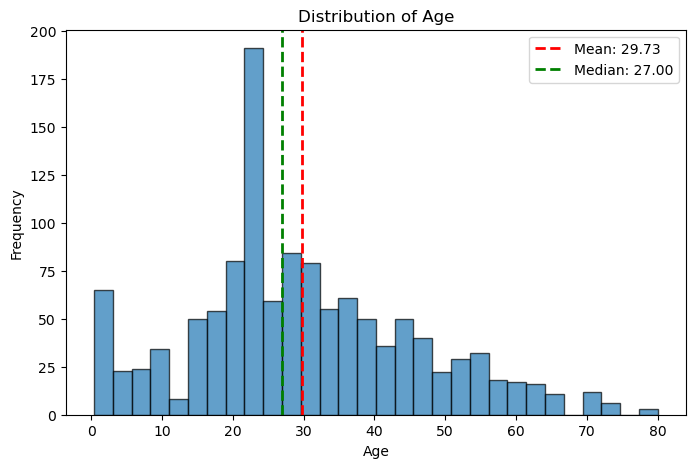

In [3]:
# Your code here
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_std = df['Age'].std()

print(f"Mean Age: {age_mean:.2f}")
print(f"Median Age: {age_median:.2f}")
print(f"Standard Deviation of Age: {age_std:.2f}")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.axvline(age_mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {age_mean:.2f}")
plt.axvline(age_median, color='g', linestyle='dashed', linewidth=2, label=f"Median: {age_median:.2f}")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.legend()
plt.show()

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

After filling missing values:
Mean Age: 29.73
Median Age: 29.73
Standard Deviation of Age: 14.98


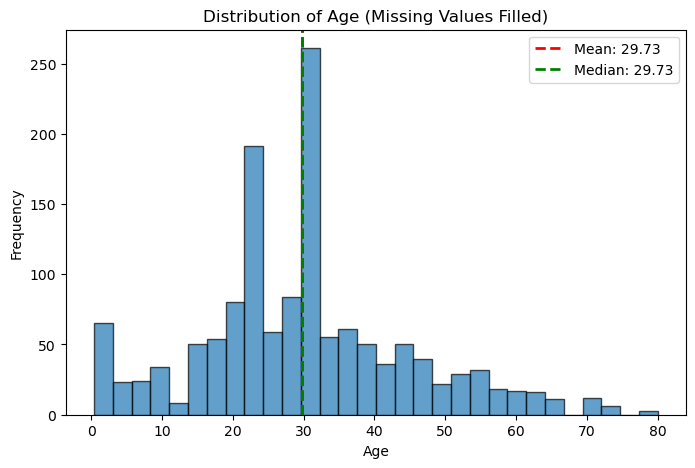

In [4]:
# Your code here
age_mean = df['Age'].mean()

df['Age_filled'] = df['Age'].fillna(age_mean)


new_mean = df['Age_filled'].mean()
new_median = df['Age_filled'].median()
new_std = df['Age_filled'].std()

print(f"After filling missing values:")
print(f"Mean Age: {new_mean:.2f}")
print(f"Median Age: {new_median:.2f}")
print(f"Standard Deviation of Age: {new_std:.2f}")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['Age_filled'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(new_mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {new_mean:.2f}")
plt.axvline(new_median, color='g', linestyle='dashed', linewidth=2, label=f"Median: {new_median:.2f}")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age (Missing Values Filled)')
plt.legend()
plt.show()

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the median age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

After filling missing values with median:
Mean Age: 29.37
Median Age: 27.00
Standard Deviation of Age: 15.01


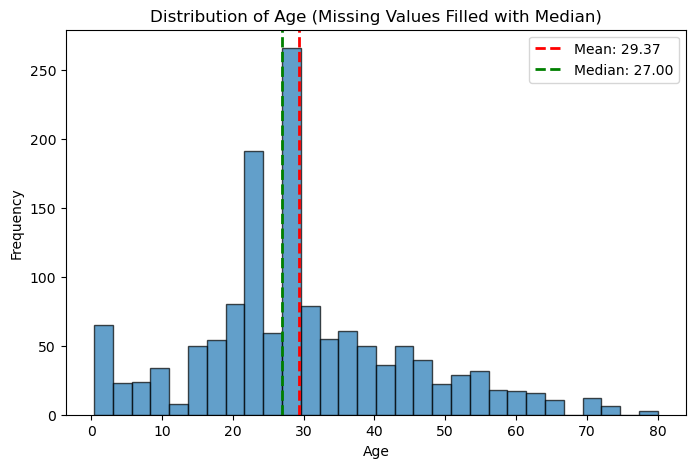

In [5]:
# Your code here
age_median = df['Age'].median()

df['Age_filled_median'] = df['Age'].fillna(age_median)

# Recalculate statistics
new_mean = df['Age_filled_median'].mean()
new_median = df['Age_filled_median'].median()
new_std = df['Age_filled_median'].std()

print(f"After filling missing values with median:")
print(f"Mean Age: {new_mean:.2f}")
print(f"Median Age: {new_median:.2f}")
print(f"Standard Deviation of Age: {new_std:.2f}")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['Age_filled_median'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(new_mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {new_mean:.2f}")
plt.axvline(new_median, color='g', linestyle='dashed', linewidth=2, label=f"Median: {new_median:.2f}")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age (Missing Values Filled with Median)')
plt.legend()
plt.show()

### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

After dropping missing values:
Mean Age: 29.73
Median Age: 27.00
Standard Deviation of Age: 16.07


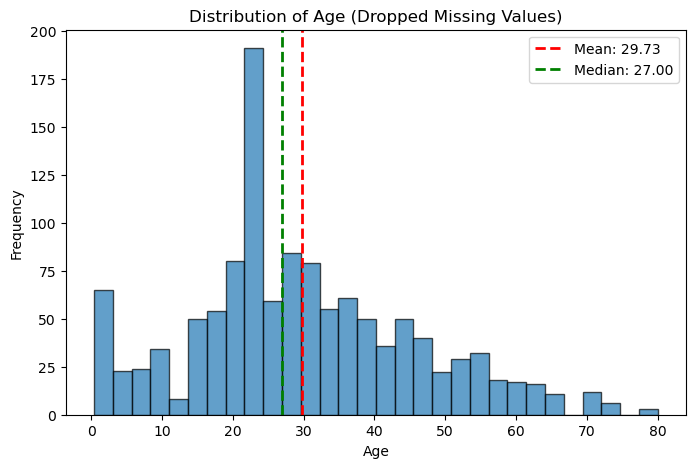

In [6]:
# Your code here
df_dropped = df.dropna(subset=['Age'])

new_mean = df_dropped['Age'].mean()
new_median = df_dropped['Age'].median()
new_std = df_dropped['Age'].std()

print(f"After dropping missing values:")
print(f"Mean Age: {new_mean:.2f}")
print(f"Median Age: {new_median:.2f}")
print(f"Standard Deviation of Age: {new_std:.2f}")

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df_dropped['Age'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(new_mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {new_mean:.2f}")
plt.axvline(new_median, color='g', linestyle='dashed', linewidth=2, label=f"Median: {new_median:.2f}")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age (Dropped Missing Values)')
plt.legend()
plt.show()

### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.